In [29]:
import os

In [30]:
os.chdir('/home/ozlem/Documents/SPICED/EXERCISES/week1')

In [31]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [32]:
fert = pd.read_csv('gapminder_total_fertility.csv', index_col=0)
life = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col=0)
pop=pd.read_csv('population.csv', sep=',', index_col=0)
cont=pd.read_csv('continents.csv', sep=';', index_col=0)

In [33]:
#Checking the shape of the data
print(life.shape)
print(fert.shape)
print(pop.shape)
print(cont.shape)

(260, 217)
(260, 216)
(275, 81)
(194, 1)


In [34]:
pop=pd.read_csv('population.csv', sep=',', index_col=0, nrows=260)
print

<function print>

In [35]:

#Fertility data process
print(fert.shape)
fert.columns
fert.columns = fert.columns.astype(int)
fert.index
fert.index.name = 'country'
fert = fert.reset_index()
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility')
fert


(260, 216)


,country,year,fertility
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
...,...,...,...
56155,Yugoslavia,2015,NaN
56156,Zambia,2015,5.59
56157,Zimbabwe,2015,3.35
56158,Åland,2015,NaN


In [36]:
#Life Expectancy data process
print(life.shape)
life.columns
life.columns = life.columns.astype(int)
life.index
life.index.name='country'
life = life.reset_index()
life= life.melt(id_vars='country', var_name='year', value_name='life_expectancy')
life

(260, 217)


,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82
...,...,...,...
56415,Yugoslavia,2016,NaN
56416,Zambia,2016,57.10
56417,Zimbabwe,2016,61.69
56418,Åland,2016,NaN


In [37]:
#Population data process
pop.columns
pop.index
pop.index.name = 'country'
pop.columns = pop.columns.astype(int)
pop= pop.reset_index()
pop = pop.melt(id_vars='country', var_name='year', value_name='population')
pop

,country,year,population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0
...,...,...,...
21055,Yugoslavia,2015,NaN
21056,Zambia,2015,16211767.0
21057,Zimbabwe,2015,15602751.0
21058,Åland,2015,NaN


In [38]:
#Continents data process
cont.columns
cont.index
cont.index.name = 'continent'
cont= cont.reset_index()
cont

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [39]:
#Checking the shape of the data
print(life.shape)
print(fert.shape)
print(pop.shape)
print(cont.shape)

(56420, 3)
(56160, 3)
(21060, 3)
(194, 2)


In [40]:
#MERGING FILES 
df1 = life.merge(fert)
df1

,country,year,life_expectancy,fertility
0,Abkhazia,1800,NaN,NaN
1,Afghanistan,1800,28.21,7.00
2,Akrotiri and Dhekelia,1800,NaN,NaN
3,Albania,1800,35.40,4.60
4,Algeria,1800,28.82,6.99
...,...,...,...,...
56155,Yugoslavia,2015,NaN,NaN
56156,Zambia,2015,56.70,5.59
56157,Zimbabwe,2015,59.30,3.35
56158,Åland,2015,NaN,NaN


In [41]:
df2 = pop.merge(cont)
df2

,country,year,population,continent
0,Afghanistan,1800,3280000.0,Asia
1,Afghanistan,1810,3280000.0,Asia
2,Afghanistan,1820,3323519.0,Asia
3,Afghanistan,1830,3448982.0,Asia
4,Afghanistan,1840,3625022.0,Asia
...,...,...,...,...
14251,South Sudan,2011,10510122.0,Africa
14252,South Sudan,2012,10980623.0,Africa
14253,South Sudan,2013,11453810.0,Africa
14254,South Sudan,2014,11911184.0,Africa


In [42]:
df=df2.merge(df1)
df

,country,year,population,continent,life_expectancy,fertility
0,Afghanistan,1800,3280000.0,Asia,28.21,7.00
1,Afghanistan,1810,3280000.0,Asia,28.11,7.00
2,Afghanistan,1820,3323519.0,Asia,28.01,7.00
3,Afghanistan,1830,3448982.0,Asia,27.90,7.00
4,Afghanistan,1840,3625022.0,Asia,27.80,7.00
...,...,...,...,...,...,...
14170,Zimbabwe,2011,14255592.0,Africa,51.60,3.64
14171,Zimbabwe,2012,14565482.0,Africa,54.20,3.56
14172,Zimbabwe,2013,14898092.0,Africa,55.70,3.49
14173,Zimbabwe,2014,15245855.0,Africa,57.00,3.41


<AxesSubplot:xlabel='life_expectancy', ylabel='fertility'>

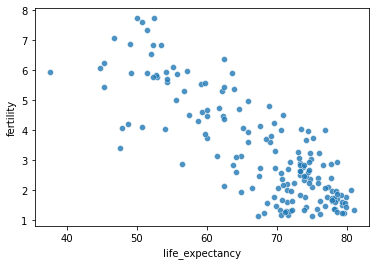

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

df_subset = df.loc[df['year'] == 2000]
sns.scatterplot(x='life_expectancy', y='fertility',
            data=df_subset, alpha=0.8)

In [44]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import animation
import seaborn as sns
import matplotlib.pyplot as plt
!pip install imageio
import imageio

In [45]:
pwd

'/home/ozlem/Documents/SPICED/EXERCISES/week1'

In [48]:
#ANIMATED IMAGE of the sctaterplot 
images = []
for year in range(1960,2016):
    df_subset = df.loc[df['year'] == year]
    lifeexp_i=plt.scatter(x='life_expectancy', y='fertility', data=df_subset, alpha=0.75)
    plt.savefig(f'/home/ozlem/Documents/SPICED/EXERCISES/week1/animation/frame_{year}.png')
    plt.close()
    images.append(imageio.imread(f'/home/ozlem/Documents/SPICED/EXERCISES/week1/animation/frame_{year}.png'))

imageio.mimsave('animated_plot.gif', images, fps=20)